In [1]:
import numpy as np 
import pandas as pd 
from scipy.stats import gamma, norm

# visualizatioion pkg 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
%config InlineBackend.figure_format='retina'

import sys 
sys.path.append("..") 
from utils.analyze import * 
from utils.viz import viz
from m3_visualize import *
viz.get_style()

## Results: implemen the classic leanring method in the MOS model

Now in MOS:

The update of feedback probability is: 

$$\psi(s_1) = \psi(s)_1 + \alpha_\psi(O(s_1) - \psi(s_1))$$
$$\psi(s_2) = 1 - \psi(s_1)$$

The update of the HA strategy is: 

$$\pi_\text{HA}(s_1) = \pi_\text{HA}(s_1) + \alpha_\text{HA}(A(s_1) - \pi_\text{HA}(s_1))$$
$$\pi_\text{HA}(s_2) = 1 - \pi_\text{HA}(s_1)$$


### The goodness of fit 

In [2]:
quantTable()

MOS(18) nll: 156.879, aic: 349.758, bic: 394.350
FLR(15) nll: 163.309, aic: 356.618, bic: 393.778
RP(9) nll: 174.380, aic: 366.759, bic: 389.055


## Policy preference HC v.s. PAT

#-------- Clean Outliers ---------- #

    308 rows
    90.6% data has been retained

------l1:
╒════════╤═════════╤═════════╤═══════════════╤═════════════╤═════════════╤═══════════╤════════╤══════════╕
│        │       T │     dof │ alternative   │       p-val │ CI95%       │   cohen-d │   BF10 │    power │
╞════════╪═════════╪═════════╪═══════════════╪═════════════╪═════════════╪═══════════╪════════╪══════════╡
│ T-test │ 4.99288 │ 225.877 │ two-sided     │ 1.18905e-06 │ [0.52 1.19] │  0.601829 │  13170 │ 0.999207 │
╘════════╧═════════╧═════════╧═══════════════╧═════════════╧═════════════╧═══════════╧════════╧══════════╛

------l2:
╒════════╤══════════╤═════════╤═══════════════╤═════════════╤═══════════════╤═══════════╤═════════╤══════════╕
│        │        T │     dof │ alternative   │       p-val │ CI95%         │   cohen-d │    BF10 │    power │
╞════════╪══════════╪═════════╪═══════════════╪═════════════╪═══════════════╪═══════════╪═════════╪══════════╡
│ T-test │ -4.49559 │ 240

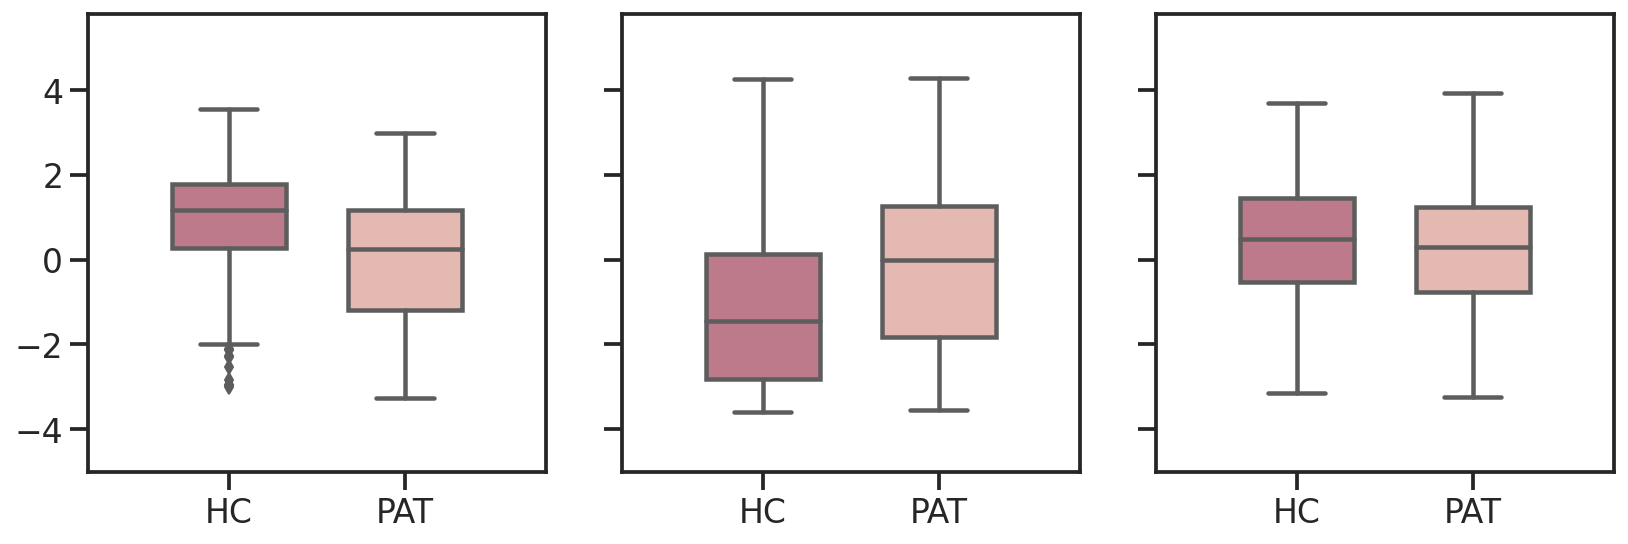

<Figure size 432x288 with 0 Axes>

In [3]:
HC_PAT_policy('MOS')

## Policy and reward

#-------- Clean Outliers ---------- #

    308 rows
    90.6% data has been retained
 gain-l1: r=0.433, p=0.000
 loss-l1: r=0.252, p=0.002
 gain-l2: r=-0.381, p=0.000
 loss-l2: r=-0.070, p=0.390
 gain-l3: r=0.111, p=0.170
 loss-l3: r=-0.148, p=0.066


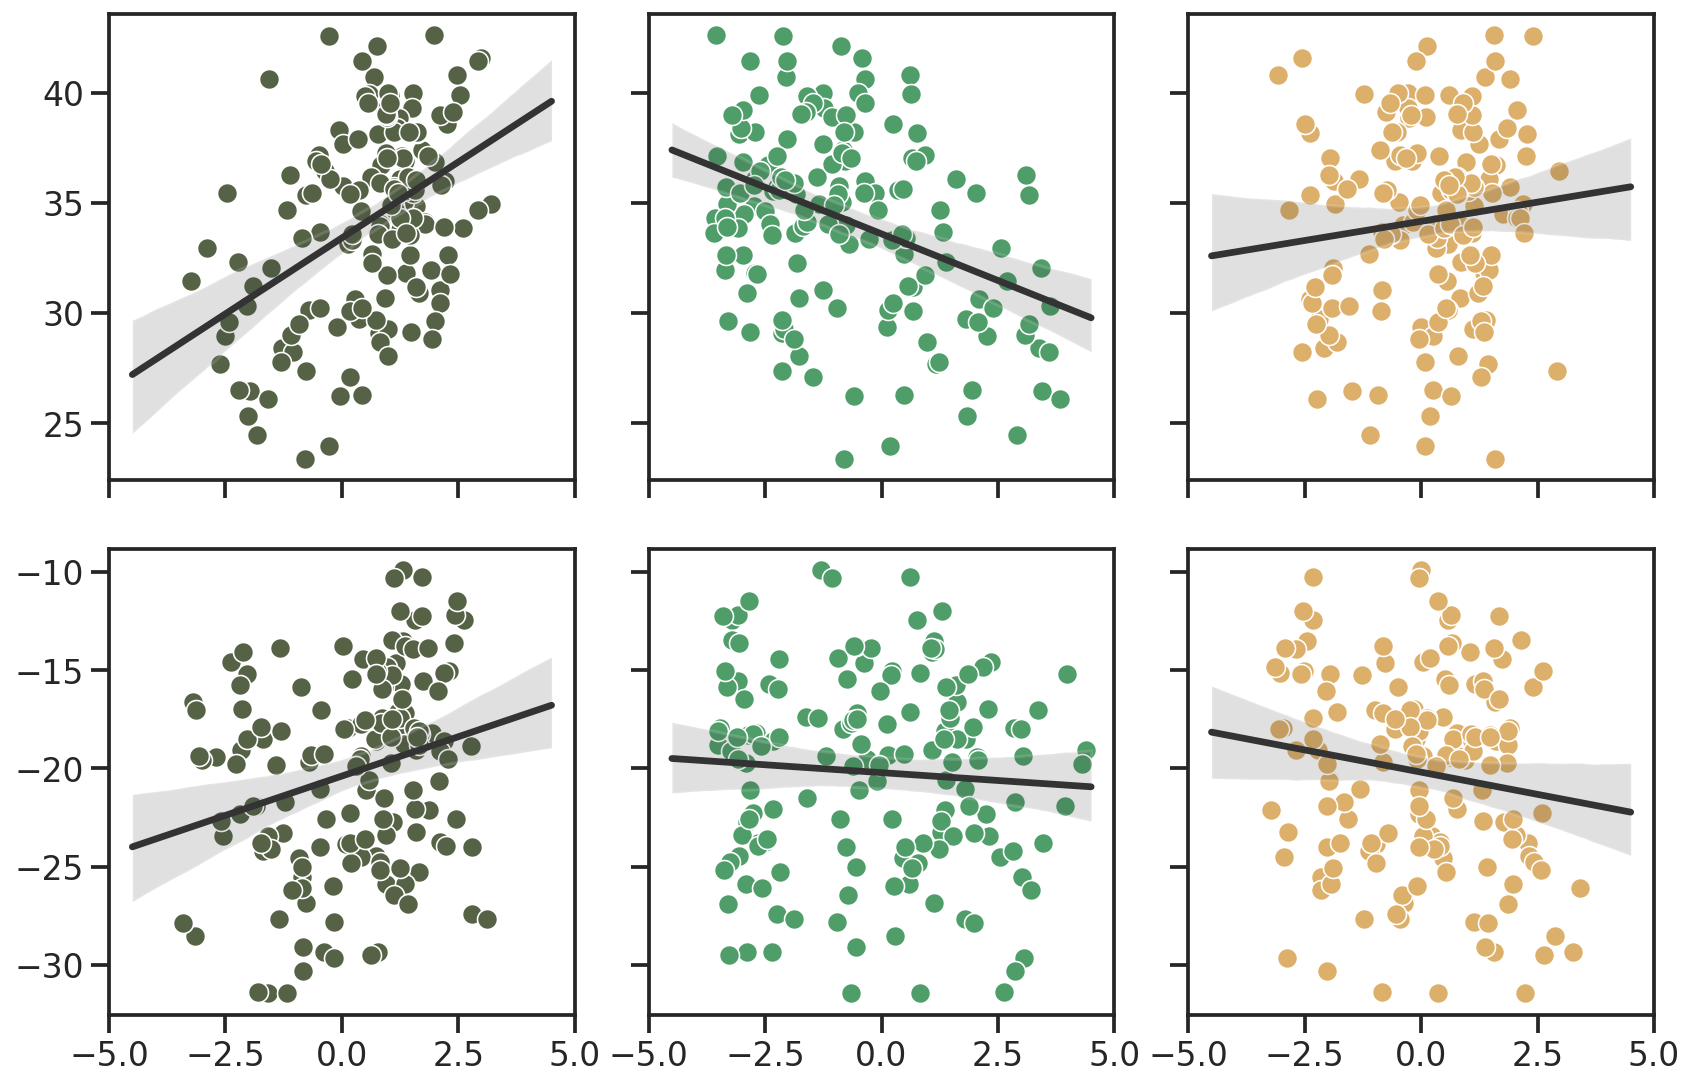

In [4]:
Policy_Rew()

## Predict the bifactor symdrone

#-------- Clean Outliers ---------- #

    308 rows
    90.6% data has been retained

-----l1:
╒════╤═══════════╤════════╤═══════╤════════╤════════╤══════╤══════════╤════════════╤═════════════╕
│    │ names     │   coef │    se │      T │   pval │   r2 │   adj_r2 │   CI[2.5%] │   CI[97.5%] │
╞════╪═══════════╪════════╪═══════╪════════╪════════╪══════╪══════════╪════════════╪═════════════╡
│  0 │ Intercept │  0.521 │ 0.118 │  4.421 │  0     │ 0.13 │     0.12 │      0.287 │       0.755 │
├────┼───────────┼────────┼───────┼────────┼────────┼──────┼──────────┼────────────┼─────────────┤
│  1 │ g         │ -0.375 │ 0.106 │ -3.545 │  0.001 │ 0.13 │     0.12 │     -0.585 │      -0.165 │
╘════╧═══════════╧════════╧═══════╧════════╧════════╧══════╧══════════╧════════════╧═════════════╛

-----l2:
╒════╤═══════════╤════════╤═══════╤════════╤════════╤═══════╤══════════╤════════════╤═════════════╕
│    │ names     │   coef │    se │      T │   pval │    r2 │   adj_r2 │   CI[2.5%] │   CI[97.5%] │
╞═

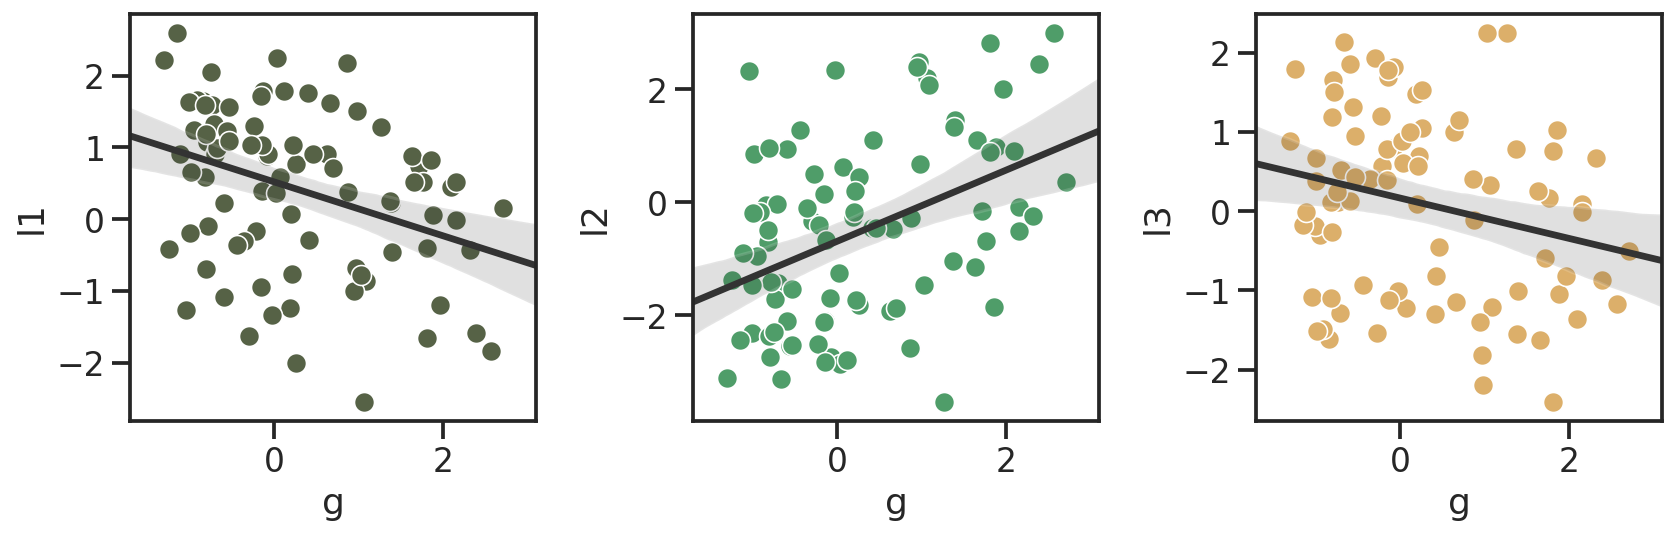

In [5]:
pred_biFactor()

## Learning rate effect: stab v.s. Vol

#-------- Clean Outliers ---------- #

    308 rows
    90.6% data has been retained

-Feedback type: gain

------log_alpha:
╒════════╤══════════╤═════════╤═══════════════╤══════════╤═══════════════╤═══════════╤════════╤══════════╕
│        │        T │     dof │ alternative   │    p-val │ CI95%         │   cohen-d │   BF10 │    power │
╞════════╪══════════╪═════════╪═══════════════╪══════════╪═══════════════╪═══════════╪════════╪══════════╡
│ T-test │ -1.05561 │ 143.738 │ two-sided     │ 0.292916 │ [-0.22  0.07] │  0.171344 │   0.29 │ 0.184198 │
╘════════╧══════════╧═════════╧═══════════════╧══════════╧═══════════════╧═══════════╧════════╧══════════╛

-Feedback type: loss

------log_alpha:
╒════════╤══════════╤════════╤═══════════════╤═════════╤═══════════════╤═══════════╤════════╤═══════════╕
│        │        T │    dof │ alternative   │   p-val │ CI95%         │   cohen-d │   BF10 │     power │
╞════════╪══════════╪════════╪═══════════════╪═════════╪═══════════════╪═══════════╪════

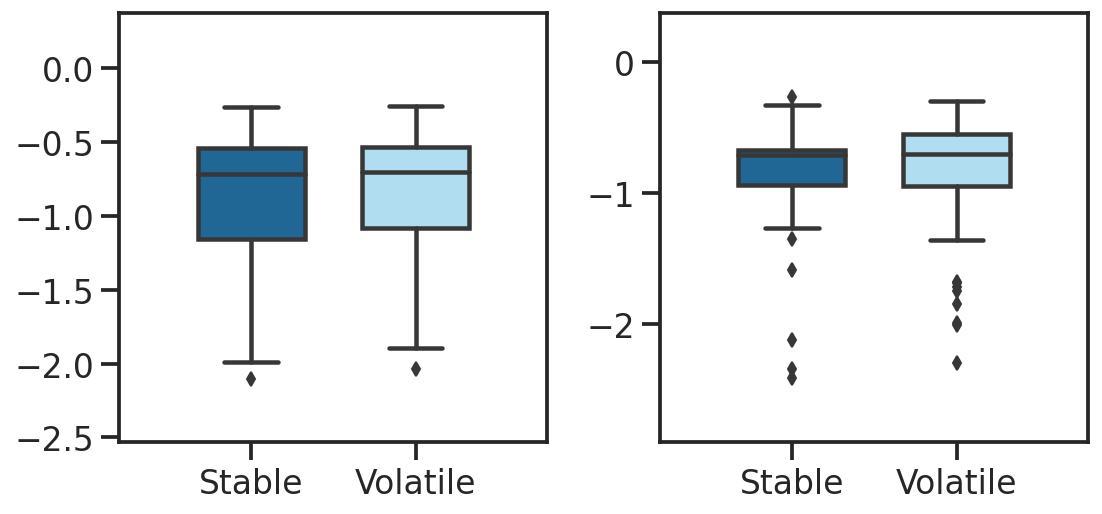

In [6]:
## The learning rate domstrates no significant difference between stable v.s. volatile
LR_effect1('MOS')

#-------- Clean Outliers ---------- #

    308 rows
    90.6% data has been retained

-----log_diff:
╒════╤═══════════╤════════╤═══════╤════════╤════════╤═══════╤══════════╤════════════╤═════════════╕
│    │ names     │   coef │    se │      T │   pval │    r2 │   adj_r2 │   CI[2.5%] │   CI[97.5%] │
╞════╪═══════════╪════════╪═══════╪════════╪════════╪═══════╪══════════╪════════════╪═════════════╡
│  0 │ Intercept │ -0.054 │ 0.039 │ -1.363 │  0.177 │ 0.011 │   -0.002 │     -0.132 │       0.025 │
├────┼───────────┼────────┼───────┼────────┼────────┼───────┼──────────┼────────────┼─────────────┤
│  1 │ g         │  0.032 │ 0.035 │  0.927 │  0.357 │ 0.011 │   -0.002 │     -0.037 │       0.102 │
╘════╧═══════════╧════════╧═══════╧════════╧════════╧═══════╧══════════╧════════════╧═════════════╛

-----log_diff:
╒════╤═══════════╤════════╤═══════╤════════╤════════╤═══════╤══════════╤════════════╤═════════════╕
│    │ names     │   coef │    se │      T │   pval │    r2 │   adj_r2 │   CI[2.5%]

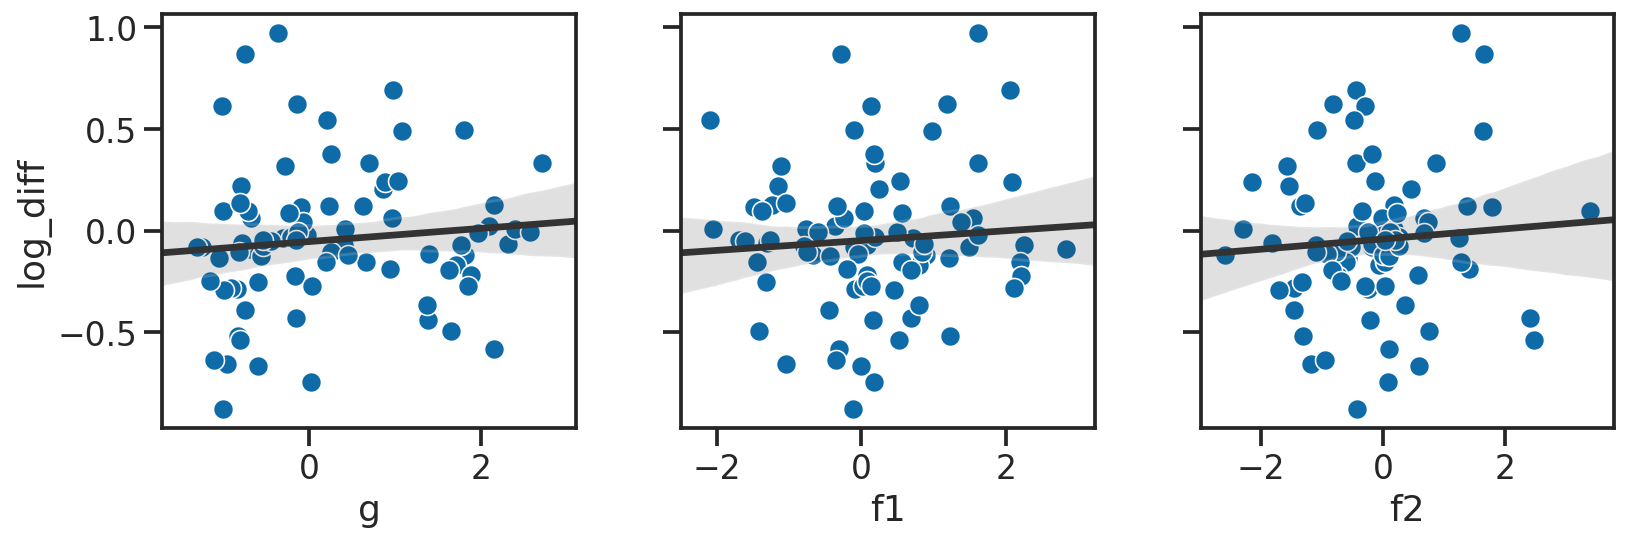

In [7]:
## The learning rate different between HC and PAT cannot predict syndrome
LR_effect2('MOS')

## Understand the strategies

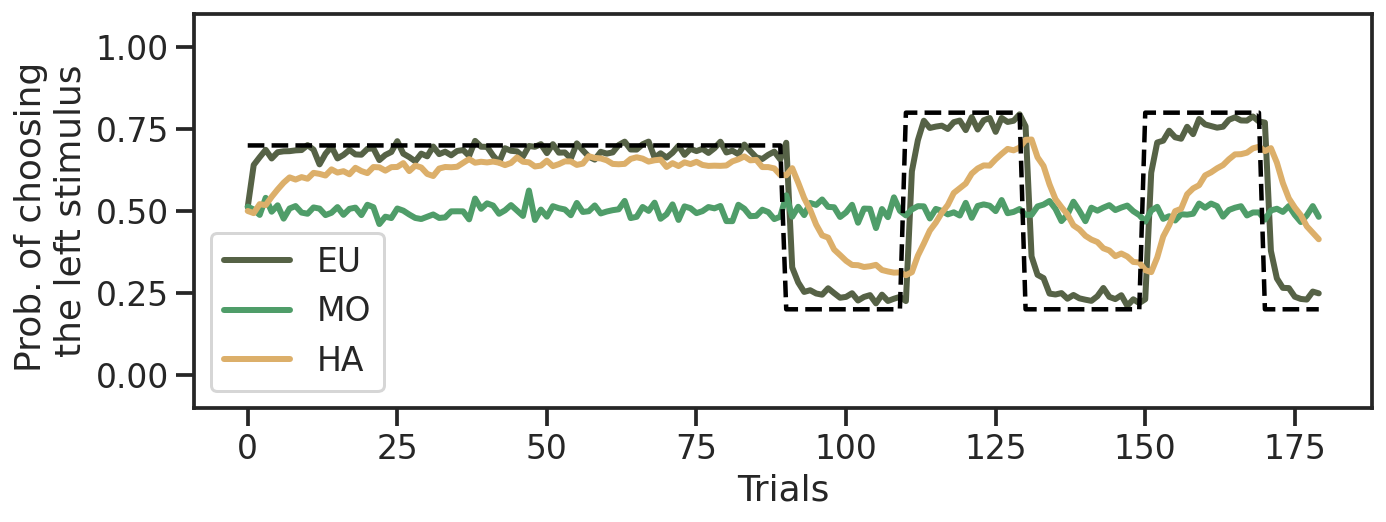

In [8]:
pi_effect()

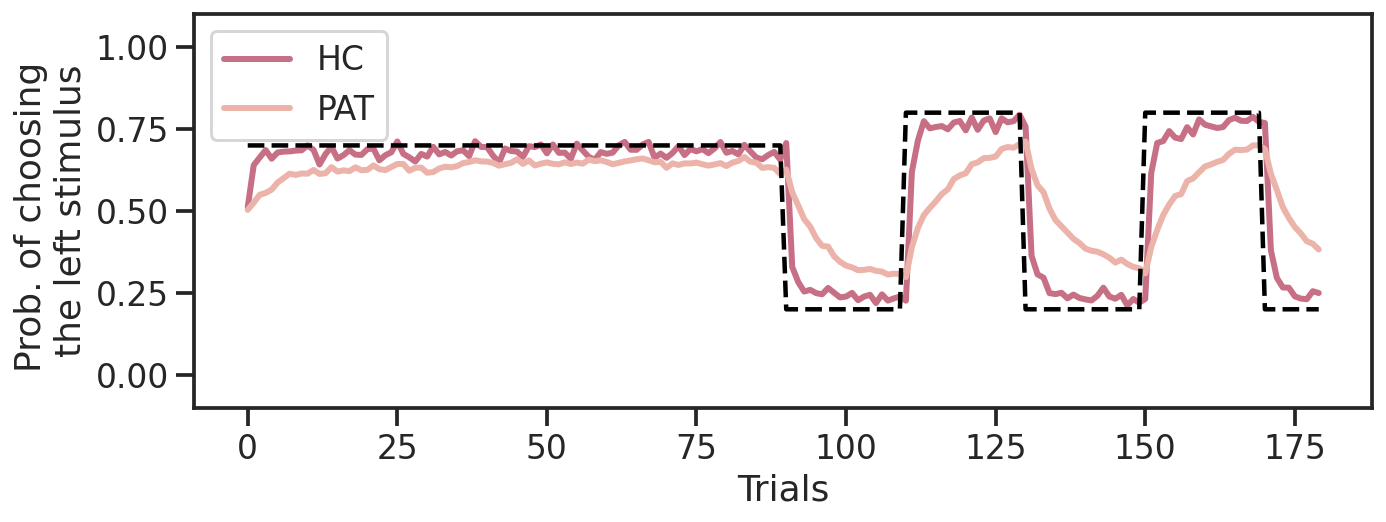

In [9]:
pi_effect2()